In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
# Read crypto_data.csv into Pandas. The dataset was obtained from CryptoCompare.
file_path = Path("crypto_data.csv")
crypto_data = pd.read_csv(file_path, index_col=0)

print(crypto_data.shape)
crypto_data.head(2)

(1252, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,41.999954,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000


In [3]:
##
crypto_data['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [4]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are 
# currently being traded
crypto_data_drop_IsT = crypto_data[(crypto_data['IsTrading'] == True)]
## crypto_data_drop_IsT.drop('Unnamed: 0', axis=1)

# Once you have done this, drop the `IsTrading` column from the dataframe.
crypto_data_drop_IsT = crypto_data_drop_IsT.drop('IsTrading', axis=1)

print(crypto_data_drop_IsT.shape)

(1144, 5)


In [5]:
## check the rows for any null value
crypto_data_drop_IsT.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [6]:
# Remove all rows that have at least one null value.
#*** crypto_data_drop_IsT.dropna(inplace=True)
crypto_data_drop_IsT = crypto_data_drop_IsT.dropna(axis=0, how='any')

print(crypto_data_drop_IsT.shape)

(685, 5)


In [7]:
## Sort values in TotalCoinsMined to identify negative or zero values
crypto_data_drop_IsT.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [8]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
crypto_data_drop_IsT = crypto_data_drop_IsT[crypto_data_drop_IsT['TotalCoinsMined'] > 0]

crypto_data_drop_IsT.shape

(532, 5)

In [9]:
# In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. 
# Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.
crypto_data_drop_IsT_CoinN = crypto_data_drop_IsT.drop('CoinName', axis=1)

print(crypto_data_drop_IsT_CoinN.shape)
crypto_data_drop_IsT_CoinN.head(2)

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000


In [10]:
# Convert the remaining features with text values, `Algorithm` and ProofType`, into numerical data.  
# To accomplish this task, use Pandas to create dummy variables.
crypto_data_drop_IsT_CoinN = pd.get_dummies(crypto_data_drop_IsT_CoinN, columns=['Algorithm', 'ProofType'])

print(crypto_data_drop_IsT_CoinN.shape)
crypto_data_drop_IsT_CoinN.head(2)

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(crypto_data_drop_IsT_CoinN)

print(type(X_scaled))
print(len(X_scaled))
print(X_scaled.shape)
X_scaled[0]

<class 'numpy.ndarray'>
532
(532, 98)


array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

# Examine the number of rows and columns of your dataset now. How did they change?

# Dimensionality Reduction
### Creating dummy variables above dramatically increased the number of features in your dataset. Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired **explained variance**. For example, say that a dataset has 100 features.  Using `PCA(n_components=0.99)` creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this project, preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?

In [12]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=.9)
principal_components = pca.fit_transform(X_scaled)

print(principal_components.shape)
principal_components

(532, 74)


array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
        -4.70138375e-15, -3.50691655e-15, -1.74331953e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
        -5.23229269e-15, -3.57954066e-15, -1.13102935e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         3.85021975e-14,  5.25975805e-14,  7.12152003e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -6.15324512e-14, -1.71623532e-15, -3.51183596e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -3.28205913e-15, -4.72721999e-15,  8.60125889e-16],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
        -1.08137723e-15, -2.35334926e-15,  4.79613766e-15]])

# Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation.


In [13]:
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(principal_components)
tsne_features.shape

C:\Users\jjel0\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(532, 2)

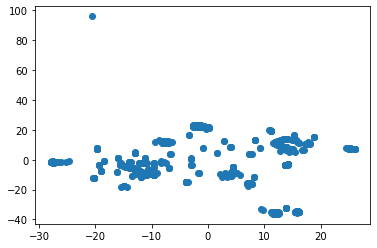

In [14]:
# Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

### Cluster Analysis with k-Means

C:\Users\jjel0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


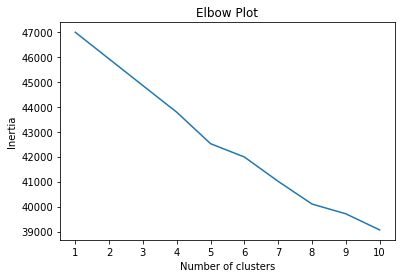

In [15]:
# Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each
# `k` between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of `k` it
# appears.
inertia = []

# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(principal_components)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

# Recommendation
### Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters? 


#### Since both the t-SNE and an elbow plot using k-means don't have any clear trends, we cannot make any meaningful recommendations from the dataset.